In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

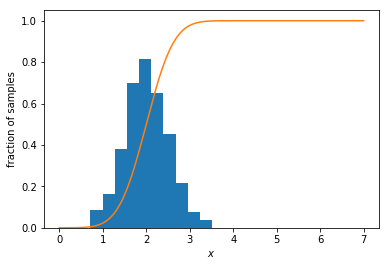

In [17]:
# Выбираем распределение Нормальное 
mu = 2.0
sigma = 0.5
norm_rv = sts.norm(loc=mu, scale=sigma)

# Генерируем выборку объемом в 1000
selection = norm_rv.rvs(size=1000)

# Строим Гистограмму из нашей выборки
# !!! Note: заменил normed на density т.к. использую python 3.7 с более новой версией Matplotlib
plt.hist(selection, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

# Строим функцию распределения
x = np.linspace(0,7,1000)
cdf = norm_rv.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')


In [18]:
initialDispersion = np.var(selection)
initialAvg = np.mean(selection)

# Дисперсия по начальной выборке = 6.718636
# Среднее выборочное по начально выборке = 6.942

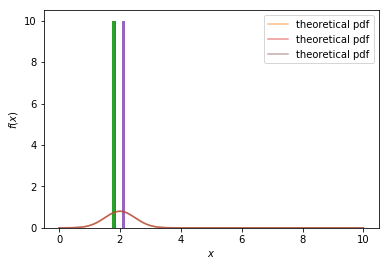

In [19]:
volumes = [5, 10, 50]

def getVolumeGraphs(n):
    # Переменная определяющая распределение по объему
    arrangementByVol = norm_rv.rvs(n)
    volMeanValues = []
    # Цикл расчитывающий среднее для всех выборок по объему
    for i in range(1000):
        volMeanValues.append(arrangementByVol.mean())
    # Рисуем гистограмму
    plt.hist(volMeanValues, density=True)
    # Рисуем распределение плотности
    x = np.linspace(0,10,1000)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)
    plt.legend()
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')

for volume in volumes:
    getVolumeGraphs(volume)


# сгенерировать тысячу выборо объемом 5 нарисовать график и плотность
# сделал 1000 выборок, посчитал среднее значение - 1000 средних зн-ий рисуешь распределение
